# shapiq with scikit-learn

The dataset stems from a kaggle competition and is available at [https://www.kaggle.com/c/bike-sharing-demand](https://www.kaggle.com/c/bike-sharing-demand).

In [1]:
import shapiq

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### data

In [11]:
X, y = shapiq.load_bike_sharing()
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.5, random_state=42
)
n_features = X.shape[1]

### model

In [12]:
model = RandomForestRegressor(n_estimators=100, max_depth=3, max_features="sqrt", random_state=42)
model.fit(X_train, y_train)
print("Train R2: {:.4f}".format(model.score(X_train, y_train)))
print("Val R2: {:.4f}".format(model.score(X_test, y_test)))

Train R2: 0.4825
Val R2: 0.4789


### explain

In [13]:
explainer_tabular = shapiq.TabularExplainer(
    model=model.predict,
    data=X_train,
    random_state=42,
    index="SII",
    max_order=2,
    approximator="auto",
)

Error: The data provided is not compatible with the model. 


In [14]:
explainer_tree = shapiq.TreeExplainer(model=model, interaction_type="SII", max_order=2)

In [15]:
x = X_test[1]

In [16]:
interaction_values_tabular = explainer_tabular.explain(x, budget=2**n_features)

In [17]:
interaction_values_tree = explainer_tree.explain(x)

### visualize

In [18]:
first_order_values = np.asarray([interaction_values_tabular[(i,)] for i in range(n_features)])
second_order_values = np.zeros((n_features, n_features))
for i in range(n_features):
    for j in range(n_features):
        if i == j:
            continue
        second_order_values[i, j] = interaction_values_tabular[(i, j)]

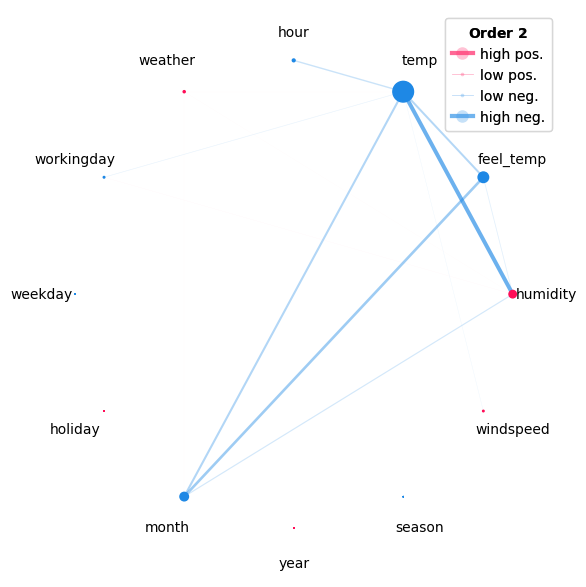

In [21]:
fig, axes = shapiq.network_plot(
    first_order_values=first_order_values,
    second_order_values=second_order_values,
    feature_names=X.columns,
)
plt.tight_layout()
plt.show()

In [22]:
first_order_values = np.asarray([interaction_values_tree[(i,)] for i in range(n_features)])
second_order_values = np.zeros((n_features, n_features))
for i in range(n_features):
    for j in range(n_features):
        if i == j:
            continue
        second_order_values[i, j] = interaction_values_tree[(i, j)]

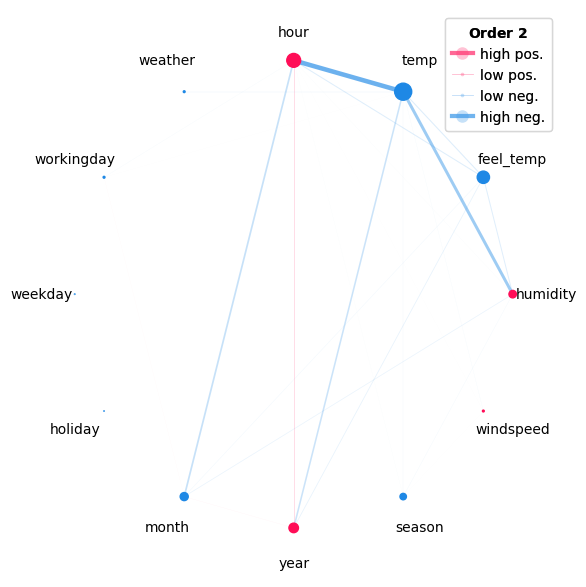

In [24]:
fig, axes = shapiq.network_plot(
    first_order_values=first_order_values,
    second_order_values=second_order_values,
    feature_names=X.columns,
)
plt.tight_layout()
plt.show()